In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import wget
import os

def data_to_panda(path, filename):
    if os.path.isfile(filename):
        pass
    else:
        wget.download(path, filename)
    return pd.read_csv(filename, delimiter=";")

In [4]:
""" 
-- 5A --
What is the change in pct of divorced danes from 2008 to 2020?
"""

path = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=*"
filename = "FOLK1A-5A.csv"

df = data_to_panda(path, filename)
start = df["INDHOLD"][0] # Finding value for 2008k1 which is used to calculate percentage
percentage_div = {}
for idx, row in df.iterrows():
    diff = row["INDHOLD"] - start
    perc = diff / row["INDHOLD"] * 100

    percentage_div[row["TID"]] = perc

percentage_div

{'2008K1': 0.0,
 '2008K2': 0.6224076005097903,
 '2008K3': 0.889504128602561,
 '2008K4': 0.7617619563305843,
 '2009K1': 1.236432974923601,
 '2009K2': 1.9663242400552272,
 '2009K3': 2.392928184843119,
 '2009K4': 2.4040343355452998,
 '2010K1': 2.9528436592723,
 '2010K2': 3.5751464256405066,
 '2010K3': 3.913893886403201,
 '2010K4': 4.112615090171668,
 '2011K1': 4.614009061206515,
 '2011K2': 5.461599506216383,
 '2011K3': 5.765922149833555,
 '2011K4': 5.919104258894451,
 '2012K1': 6.4494033985559405,
 '2012K2': 7.320341100147383,
 '2012K3': 7.812815717632897,
 '2012K4': 8.039351911415315,
 '2013K1': 8.536525546448962,
 '2013K2': 9.387016894433035,
 '2013K3': 9.99838407410594,
 '2013K4': 10.101958679903406,
 '2014K1': 11.817344387419396,
 '2014K2': 12.993270563126257,
 '2014K3': 13.721435052276446,
 '2014K4': 14.363362254016115,
 '2015K1': 14.993112060336369,
 '2015K2': 15.348159669654434,
 '2015K3': 15.896156667098104,
 '2015K4': 16.410556270221807,
 '2016K1': 17.02575532441803,
 '2016K2': 1

In [13]:
"""
-- 5B --
Which of the 5 biggest cities has the highest percentage of 'Never Married'?
"""
path = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=851%2C101%2C561%2C461%2C751&CIVILSTAND=TOT%2CU&Tid=2020K1"
filename = "FOLK1A-5B.csv"

df = data_to_panda(path, filename)
biggest_cities = ["Aalborg", "København", "Esbjerg", "Odense", "Aarhus"]
city_highest = ""
highest = 0

for city in biggest_cities:
    c = df.loc[df["OMRÅDE"] == city]
    unmarried = (c.loc[c["CIVILSTAND"] == "Ugift"]).iat[0, 3]
    everyone = (c.loc[c["CIVILSTAND"] == "I alt"]).iat[0, 3]
    percent = unmarried / everyone * 100
    
    if percent > highest:
        city_highest = city
        highest = percent

city_highest, highest

('København', 65.23579087199924)

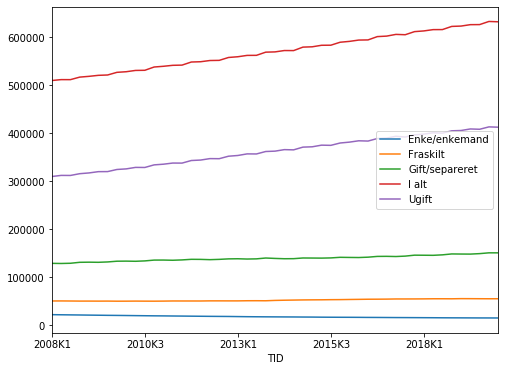

In [14]:
"""
-- 5C --
Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
"""
path = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=U%2CG%2CF%2CE%2CTOT&Tid=*"
filename = "FOLK1A-5C.csv"
df = data_to_panda(path, filename)

# Getting groups for ugift, gift, fraskilt
civilstand_groups = df.groupby("CIVILSTAND")
fig, ax = plt.subplots(figsize=(8, 6))

for name, group in civilstand_groups:
    group.plot(x="TID", y="INDHOLD", ax=ax, label=name)

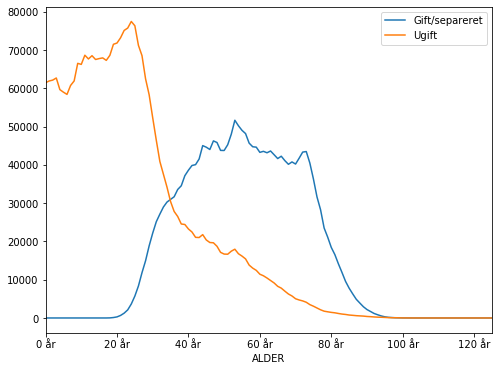

In [15]:
"""
-- 5D --
Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)
"""
path = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&ALDER=*&CIVILSTAND=G%2CU"
filename = "FOLK1A-5D.csv"

df = data_to_panda(path, filename)

# Remove the two rows with 'i alt'
df = df.drop([0, 1])
colors = ["r", "g"]

civilstand = df.groupby("CIVILSTAND")

# Couldn't make a readible bar chart - line instead
fig, ax = plt.subplots(figsize=(8, 6))
for name, group in civilstand:
    group.plot(x="ALDER", y="INDHOLD", ax=ax, label=name, rot=0)